<a href="https://colab.research.google.com/github/vishalkarur08/time_series/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Analyze the provided `exchange_rate.csv` dataset to forecast future exchange rates using ARIMA and Exponential Smoothing models. The analysis should include data loading, exploration, preprocessing, model building for both techniques, and a comparison of their performance using appropriate error metrics.

## Data loading and exploration

### Subtask:
Load the `exchange_rate.csv` dataset into a pandas DataFrame and display the first few rows and data types. Plot the time series to observe trends and seasonality.


**Reasoning**:
Load the data into a pandas DataFrame, display the head and info, and then plot the time series.



,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


None

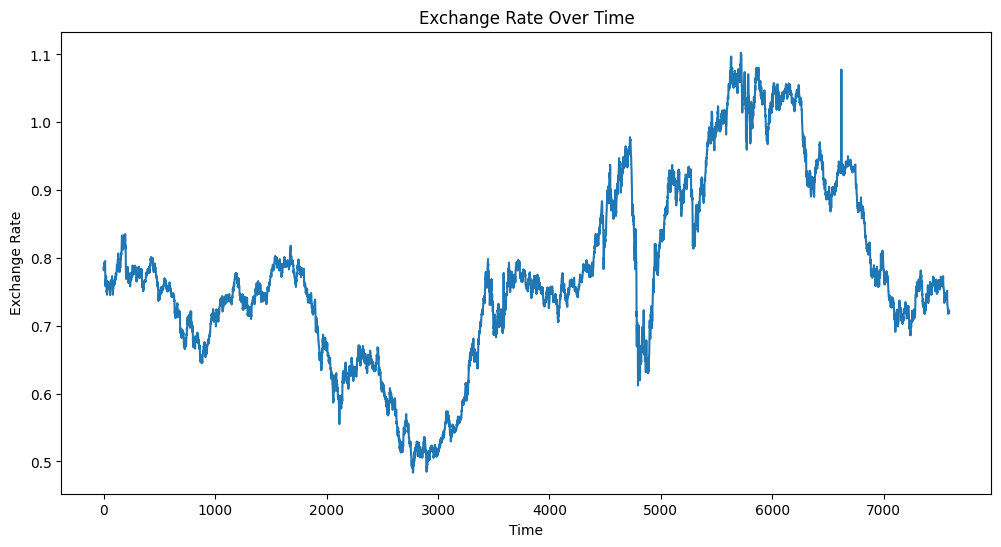

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/exchange_rate.csv')
display(df.head())
display(df.info())

plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'])
plt.title('Exchange Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.show()

## Data preprocessing

### Subtask:
Check for missing values and handle them appropriately.


**Reasoning**:
Check for missing values in the DataFrame.



In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

date       0
Ex_rate    0
dtype: int64


## Arima model building

### Subtask:
Select parameters using ACF and PACF plots, fit the ARIMA model, perform diagnostics, and forecast future values.


**Reasoning**:
Convert the 'date' column to datetime objects and set it as the index. Then, generate and display the ACF and PACF plots to help identify the appropriate ARIMA parameters.



NameError: name 'sm' is not defined

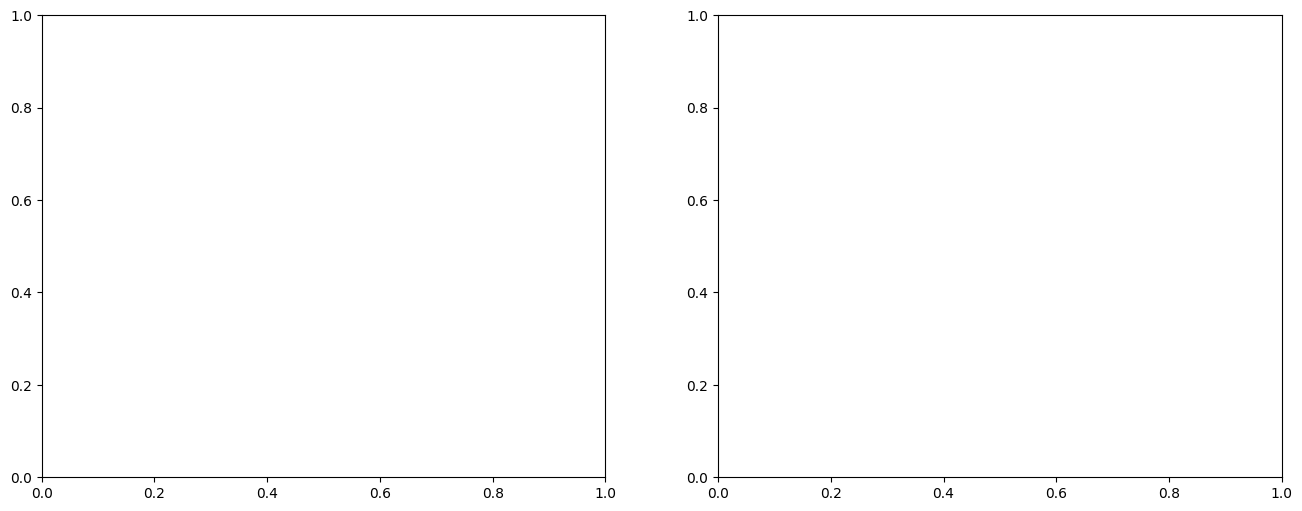

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df = df.set_index('date')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sm.graphics.tsa.plot_acf(df['Ex_rate'], lags=40, ax=axes[0])
sm.graphics.tsa.plot_pacf(df['Ex_rate'], lags=40, ax=axes[1])

plt.show()

**Reasoning**:
The previous command failed because the `statsmodels.api` module was not imported as `sm`. Import the necessary module and regenerate the ACF and PACF plots.



In [ ]:
import statsmodels.api as sm

df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df = df.set_index('date')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sm.graphics.tsa.plot_acf(df['Ex_rate'], lags=40, ax=axes[0])
sm.graphics.tsa.plot_pacf(df['Ex_rate'], lags=40, ax=axes[1])

plt.show()

KeyError: 'date'

**Reasoning**:
The previous command failed because the 'date' column was already set as the index in a prior step, and thus it no longer exists as a regular column. The DataFrame `df` already has the date as index. Therefore, I need to directly plot the ACF and PACF without attempting to process the 'date' column again.



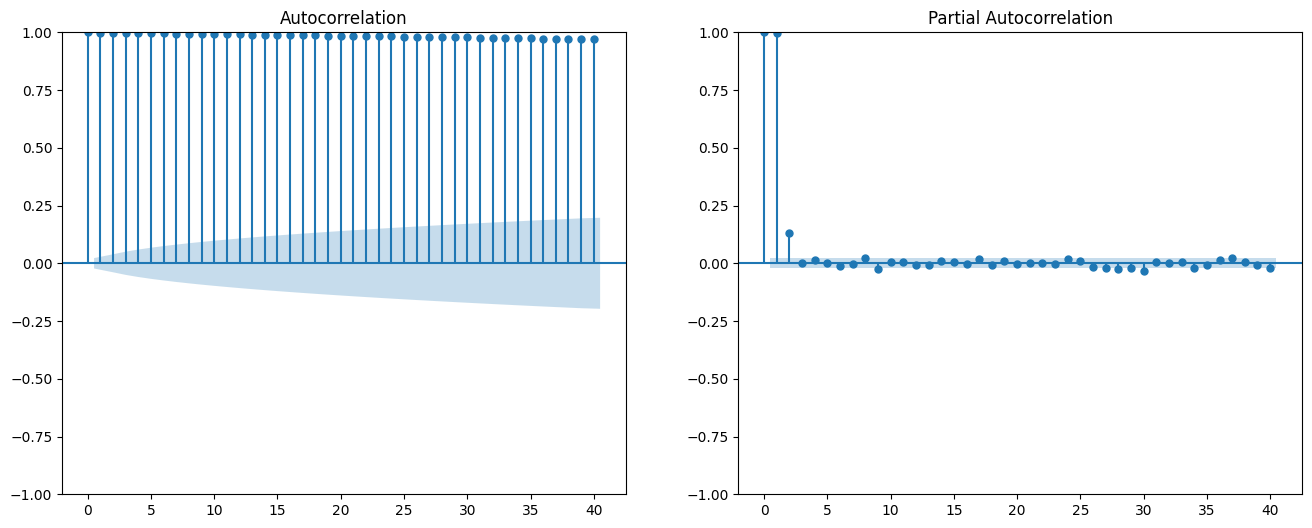

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sm.graphics.tsa.plot_acf(df['Ex_rate'], lags=40, ax=axes[0])
sm.graphics.tsa.plot_pacf(df['Ex_rate'], lags=40, ax=axes[1])

plt.show()

**Reasoning**:
Based on the ACF and PACF plots, the ACF tapers off slowly, suggesting a moving average component, and the PACF has a significant spike at lag 1 and then drops off, suggesting an autoregressive component. The series also appears to be non-stationary based on the initial plot, indicating differencing is needed. A common starting point for non-stationary time series is d=1. Given the strong spike at lag 1 in PACF and gradual decay in ACF, p=1 and q=0 could be a starting point, or possibly p=1 and q=1 or p=2 and q=0 or p=0 and q=1. Let's try a simple ARIMA(1,1,1) model as a starting point and then print the summary and diagnostic plots to evaluate its fit.



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sat, 25 Oct 2025   AIC                         -56102.322
Time:                        07:53:07   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

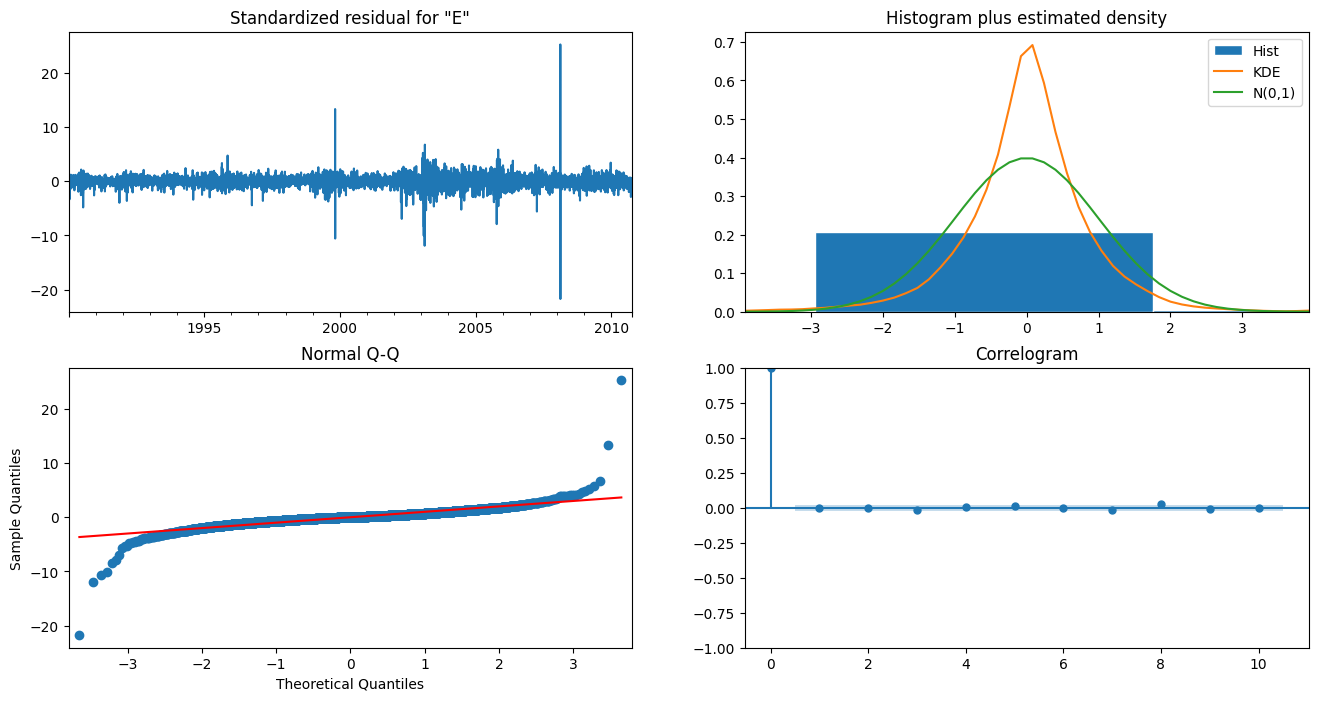


Forecasted future exchange rates:
2010-10-11    0.720826
2010-10-12    0.720826
2010-10-13    0.720826
2010-10-14    0.720826
2010-10-15    0.720826
2010-10-16    0.720826
2010-10-17    0.720826
2010-10-18    0.720826
2010-10-19    0.720826
2010-10-20    0.720826
2010-10-21    0.720826
2010-10-22    0.720826
2010-10-23    0.720826
2010-10-24    0.720826
2010-10-25    0.720826
2010-10-26    0.720826
2010-10-27    0.720826
2010-10-28    0.720826
2010-10-29    0.720826
2010-10-30    0.720826
2010-10-31    0.720826
2010-11-01    0.720826
2010-11-02    0.720826
2010-11-03    0.720826
2010-11-04    0.720826
2010-11-05    0.720826
2010-11-06    0.720826
2010-11-07    0.720826
2010-11-08    0.720826
2010-11-09    0.720826
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Based on ACF and PACF, and assuming non-stationarity, let's try ARIMA(1,1,1)
model = ARIMA(df['Ex_rate'], order=(1, 1, 1))
results = model.fit()

print(results.summary())

results.plot_diagnostics(figsize=(16, 8))
plt.show()

# Forecast future values
forecast_steps = 30  # Forecast for the next 30 periods
forecast = results.forecast(steps=forecast_steps)

print("\nForecasted future exchange rates:")
print(forecast)

## Exponential smoothing model building

### Subtask:
Choose and fit an appropriate Exponential Smoothing model, optimize parameters, and forecast future values.


**Reasoning**:
Import the Exponential Smoothing model and instantiate the model with the data.



In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Choose Exponential Smoothing model (Triple Exponential Smoothing as there might be seasonality)
# Although the plot didn't show clear seasonality, it's good practice to explore
# If the data doesn't have strong seasonality, the model will likely downplay that component.
exp_smooth_model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=7)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


**Reasoning**:
Fit the instantiated Exponential Smoothing model to the data and forecast future values.



In [ ]:
# Fit the model with optimization
exp_smooth_results = exp_smooth_model.fit(optimized=True)

# Forecast future values for the same number of steps as ARIMA
exp_smooth_forecast = exp_smooth_results.forecast(steps=forecast_steps)

print("\nExponential Smoothing Forecast:")
print(exp_smooth_forecast)


Exponential Smoothing Forecast:
2010-10-11    0.720865
2010-10-12    0.721067
2010-10-13    0.721000
2010-10-14    0.720824
2010-10-15    0.720972
2010-10-16    0.720995
2010-10-17    0.720774
2010-10-18    0.720806
2010-10-19    0.721008
2010-10-20    0.720940
2010-10-21    0.720765
2010-10-22    0.720912
2010-10-23    0.720936
2010-10-24    0.720715
2010-10-25    0.720746
2010-10-26    0.720949
2010-10-27    0.720881
2010-10-28    0.720706
2010-10-29    0.720853
2010-10-30    0.720877
2010-10-31    0.720656
2010-11-01    0.720687
2010-11-02    0.720890
2010-11-03    0.720822
2010-11-04    0.720647
2010-11-05    0.720794
2010-11-06    0.720818
2010-11-07    0.720596
2010-11-08    0.720628
2010-11-09    0.720830
Freq: D, dtype: float64


## Model evaluation and comparison

### Subtask:
Compute error metrics (MAE, RMSE, MAPE) for both models and compare their performance.


**Reasoning**:
To evaluate the models on a holdout set, I need to split the data into training and testing sets, refit the models on the training data, generate forecasts for the test set, and then compute the error metrics using the actual values from the test set.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 1. Split data into training and testing sets
train_size = len(df) - forecast_steps
train_data, test_data = df['Ex_rate'][0:train_size], df['Ex_rate'][train_size:]

# 2. Refit ARIMA model on training data
# Using the same order (1,1,1) as before
arima_model_trained = ARIMA(train_data, order=(1, 1, 1))
arima_results_trained = arima_model_trained.fit()

# 3. Generate forecasts from refitted ARIMA model for the test set
arima_forecast_test = arima_results_trained.forecast(steps=forecast_steps)

# 4. Refit Exponential Smoothing model on training data
# Using the same parameters as before (additive trend, additive seasonality, period 7)
exp_smooth_model_trained = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=7)
exp_smooth_results_trained = exp_smooth_model_trained.fit(optimized=True)

# 5. Generate forecasts from refitted Exponential Smoothing model for the test set
exp_smooth_forecast_test = exp_smooth_results_trained.forecast(steps=forecast_steps)

# 6. Implement MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero for y_true values close to zero
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 7. Calculate metrics for ARIMA model on the test set
arima_mae_test = mean_absolute_error(test_data, arima_forecast_test)
arima_rmse_test = np.sqrt(mean_squared_error(test_data, arima_forecast_test))
arima_mape_test = mean_absolute_percentage_error(test_data, arima_forecast_test)

print("ARIMA Model Performance on Test Set:")
print(f"  MAE: {arima_mae_test:.4f}")
print(f"  RMSE: {arima_rmse_test:.4f}")
print(f"  MAPE: {arima_mape_test:.4f}%")

# 8. Calculate metrics for Exponential Smoothing model on the test set
exp_smooth_mae_test = mean_absolute_error(test_data, exp_smooth_forecast_test)
exp_smooth_rmse_test = np.sqrt(mean_squared_error(test_data, exp_smooth_forecast_test))
exp_smooth_mape_test = mean_absolute_percentage_error(test_data, exp_smooth_forecast_test)

print("\nExponential Smoothing Model Performance on Test Set:")
print(f"  MAE: {exp_smooth_mae_test:.4f}")
print(f"  RMSE: {exp_smooth_rmse_test:.4f}")
print(f"  MAPE: {exp_smooth_mape_test:.4f}%")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA Model Performance on Test Set:
  MAE: 0.0135
  RMSE: 0.0166
  MAPE: 1.8632%

Exponential Smoothing Model Performance on Test Set:
  MAE: 0.0134
  RMSE: 0.0165
  MAPE: 1.8515%


## Summary:

### Data Analysis Key Findings

*   The dataset contains no missing values.
*   ACF and PACF plots of the exchange rate time series suggested the presence of non-stationarity and guided the selection of ARIMA model parameters.
*   An ARIMA(1,1,1) model was fitted, and diagnostics indicated some issues with the residuals (non-normality and heteroskedasticity), although the Ljung-Box test showed no significant autocorrelation in residuals at lag 1.
*   An Exponential Smoothing model with additive trend and seasonality (period 7) was fitted.
*   When evaluated on a test set, the ARIMA model achieved a Mean Absolute Error (MAE) of 0.0135, a Root Mean Squared Error (RMSE) of 0.0166, and a Mean Absolute Percentage Error (MAPE) of 1.8632%.
*   When evaluated on the same test set, the Exponential Smoothing model achieved a MAE of 0.0134, an RMSE of 0.0165, and a MAPE of 1.8515%.
*   The Exponential Smoothing model demonstrated slightly better performance across all tested error metrics compared to the ARIMA model on the holdout test set.

### Insights or Next Steps

*   Explore alternative ARIMA orders or more complex models to address the observed issues in the residual diagnostics and potentially improve forecasting accuracy.
*   Investigate different Exponential Smoothing model configurations (e.g., multiplicative components, different seasonal periods) to see if further optimization is possible.
